In [2]:
import os
import numpy as np
import pandas as pd 
from pylab import *
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import mpl_toolkits.mplot3d

In [3]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    "text.usetex": True,
    "grid.alpha": .5,
})
plt.style.use('ggplot')

# Equação de Laplace: Campos e Potenciais 

## Questão 1:

Em duas dimensões, quadrado de lado L com potencial V=1 e quadrado interno no centro com lado L/2 e totalmente com V=0

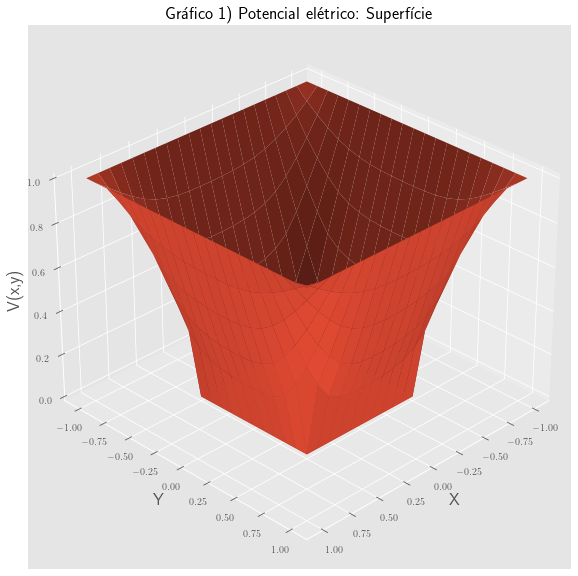

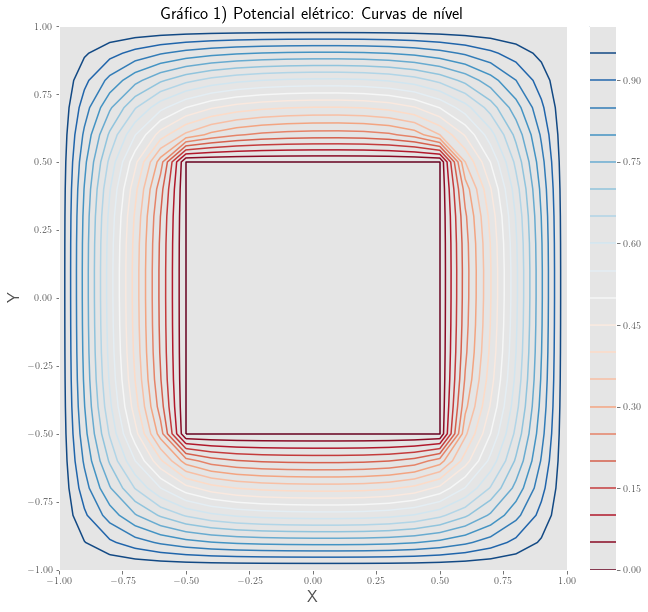

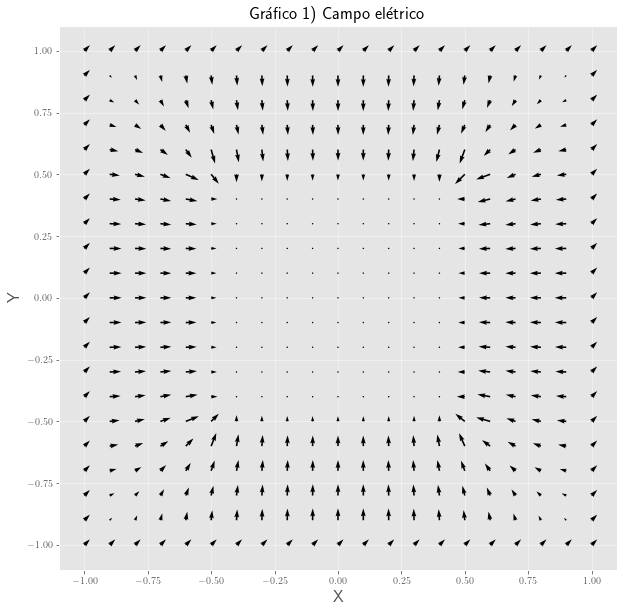

In [182]:
V0=np.zeros((21,21)) #Initializing two dimension array (21x21)

#Edge of the square with V=1
V0[0,:]=1
V0[-1,:]=1
V0[:,0]=1
V0[:,-1]=1

# V0[5:15,5:15]=0 always
itr=0 #starting iteration n
dx=0.1 #step

VV=[] #iterations list
VV.append(V0)

while(True):
    VV.append(V0)
    for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
        for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
            VV[itr+1][i][j]=(VV[itr][i+1][j]+VV[itr][i-1][j]+VV[itr][i][j+1]+VV[itr][i][j-1])/4.0
            
    #boundary condition:
    VV[itr+1][5:16,5:16]=0
    VV[itr+1][0,:]=1
    VV[itr+1][-1,:]=1
    VV[itr+1][:,0]=1
    VV[itr+1][:,-1]=1

    dVV=VV[itr+1]-VV[itr]
    dV=0
    for i in range(1,V0.shape[0]-1):
        for j in range(1,V0.shape[0]-1):
            dV=dV+abs(dVV[i][j])
    #print dV 
          
    itr=itr+1
    if dV<0.0001 and itr>14:
        break

V=np.array(VV[-1])

Ex=array(V0)
Ey=array(V0)
for i in range(1,V0.shape[0]-1):
    for j in range(1,V0.shape[1]-1):
        Ex[j][i]=-(V[j][i+1]-V[j][i-1])/(2*dx)
        Ey[j][i]=-(V[j+1][i]-V[j-1][i])/(2*dx)


fig= plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title("Gráfico 1) Potencial elétrico: Superfície",fontsize='xx-large')
ax.plot_surface(X,Y,V,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('V(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
fig.savefig('grafico1a.png', bbox_inches='tight', dpi=100)
plt.show()

levels=[i*0.05 for i in range(21)]
fig=plt.figure(figsize=(10,10))
plt.contour(X,Y,V,vmin=0., vmax=1.,levels=levels,cmap=matplotlib.cm.RdBu)
plt.title("Gráfico 1) Potencial elétrico: Curvas de nível",fontsize='xx-large')
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
plt.colorbar(fraction=0.05, pad=0.04)
plt.grid(False)
fig.savefig('grafico1b.png', bbox_inches='tight', dpi=100)
plt.show()

fig=plt.figure(figsize=(10,10))
Q=quiver(X,Y,Ex,Ey,scale=100)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.title("Gráfico 1) Campo elétrico",fontsize='xx-large')
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
fig.savefig('grafico1c.png', bbox_inches='tight', dpi=100)
plt.show()

## Questão 2:
Caixa Retangular com borda em V=0 e um capacitor no meio, uma placa com V=1 e outra com V=-1

(21, 41)
(41,) (21,)


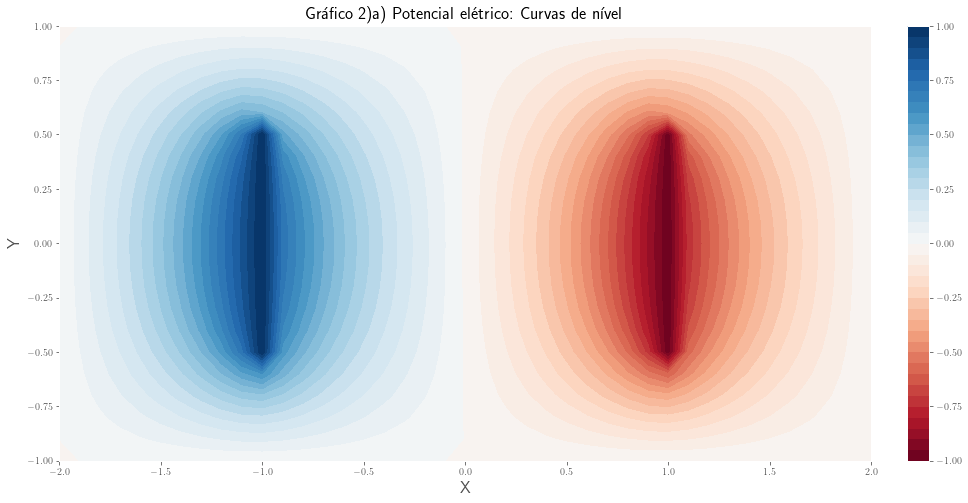

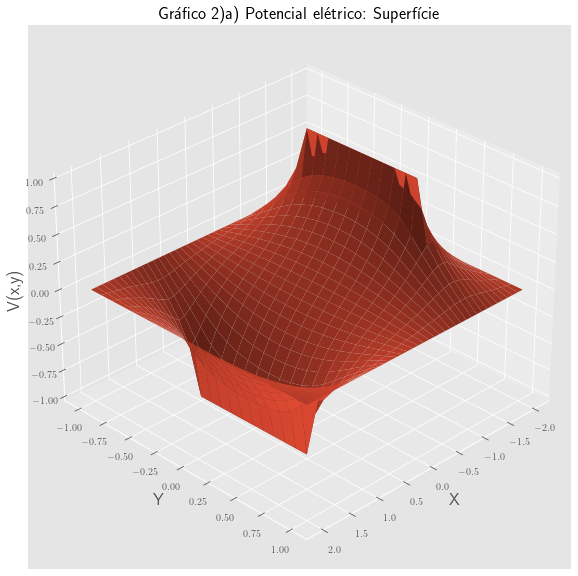

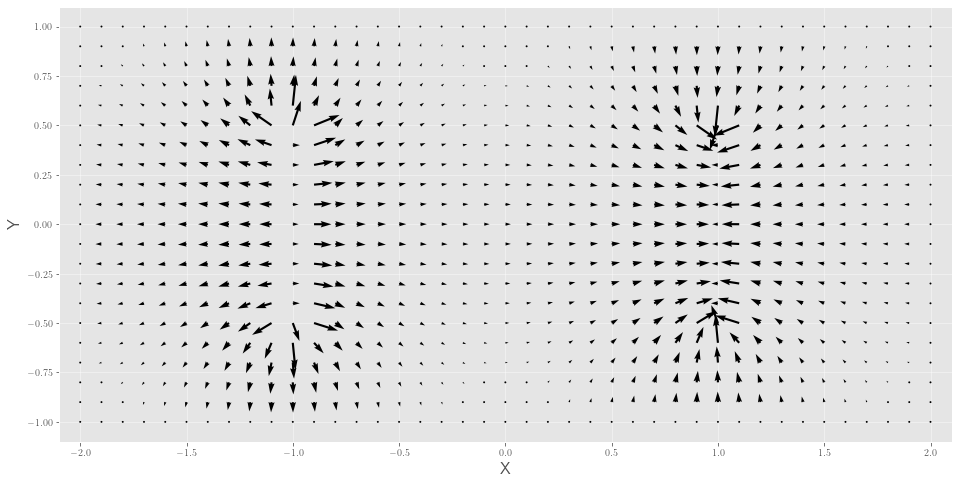

In [238]:
V0=np.zeros((21,41)) #Initializing two dimension array (21x21)

#Edge of the square with V=1
V0[0,:]=0
V0[-1,:]=0
V0[:,0]=0
V0[:,-1]=0
V0[5:16,-11]=-1
V0[5:16,10]=1
# V0[5:15,5:15]=0 always
itr=0 #starting iteration n
dx=0.1 #step

VV=[] #iterations list
VV.append(V0)

while(True):
    VV.append(V0)
    for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
        for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
            VV[itr+1][i][j]=(VV[itr][i+1][j]+VV[itr][i-1][j]+VV[itr][i][j+1]+VV[itr][i][j-1])/4.0
            
    #boundary condition:
    VV[itr+1][5:16,-11]=-1
    VV[itr+1][5:16,10]=1
    VV[itr+1][0,:]=0
    VV[itr+1][-1,:]=0
    VV[itr+1][:,0]=0
    VV[itr+1][:,-1]=0

    dVV=VV[itr+1]-VV[itr]
    dV=0
    for i in range(1,V0.shape[0]-1):
        for j in range(1,V0.shape[0]-1):
            dV=dV+abs(dVV[i][j])
    #print dV 
          
    itr=itr+1
    if dV<0.0001 and itr>55:
        break

V=np.array(VV[-1])
print(V.shape)
x=np.arange(-2.0,2.01,dx)
y=np.arange(-1.0,1.01,dx)
print(x.shape,y.shape)
X,Y=np.meshgrid(x,y)
levels=np.linspace(-1,1,41)
fig=plt.figure(figsize=(16,8))
plt.contourf(X,Y,V,vmin=-1., vmax=1.,levels=levels,cmap=matplotlib.cm.RdBu)
plt.title("Gráfico 2)a) Potencial elétrico: Curvas de nível",fontsize='xx-large')
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
plt.colorbar(fraction=0.05, pad=0.04)
plt.grid(False)
fig.savefig('grafico2a1.png', bbox_inches='tight', dpi=100)
plt.show()

fig= plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("Gráfico 2)a) Potencial elétrico: Superfície",fontsize='xx-large')
ax.plot_surface(X,Y,V,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('V(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
fig.savefig('grafico2a2.png', bbox_inches='tight', dpi=100)
plt.show()

Ex=np.zeros((21,41))
Ey=np.zeros((21,41))
for i in range(1,40):
    for j in range(1,20):
        Ex[j][i]=-(V[j][i+1]-V[j][i-1])/(2*dx)
        Ey[j][i]=-(V[j+1][i]-V[j-1][i])/(2*dx)

fig=plt.figure(figsize=(16,8))
Q=quiver(X,Y,Ex,Ey,scale=100)
plt.xlim(-2.1,2.1)
plt.ylim(-1.1,1.1)
#plt.title("Gráfico 1) Campo elétrico",fontsize='xx-large')
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
#fig.savefig('grafico1c.png', bbox_inches='tight', dpi=100)
plt.show()

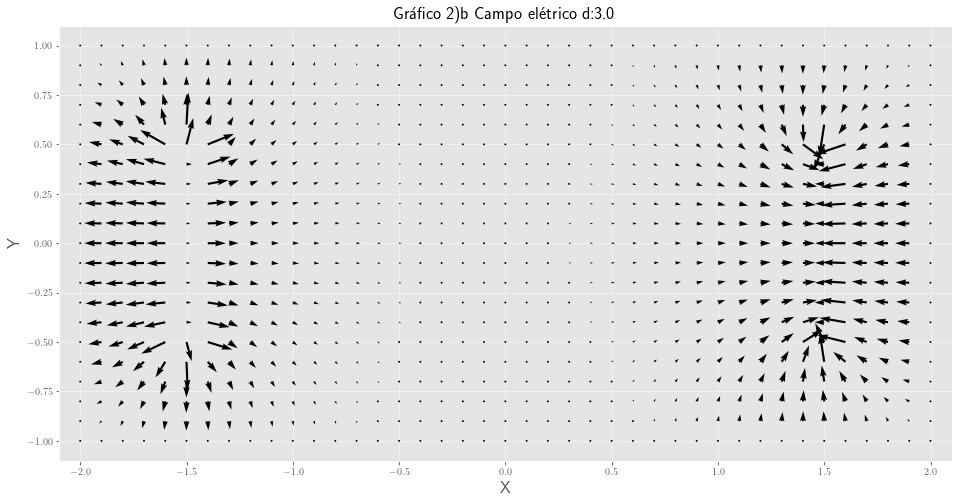

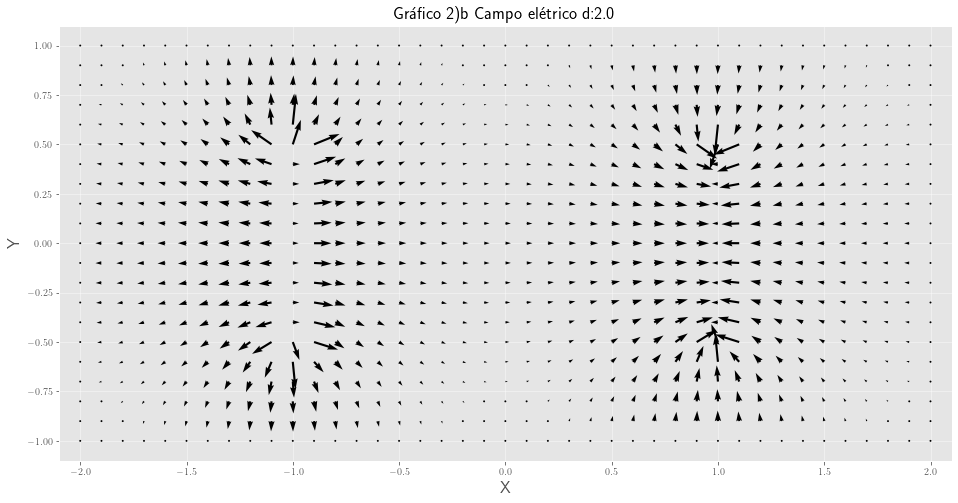

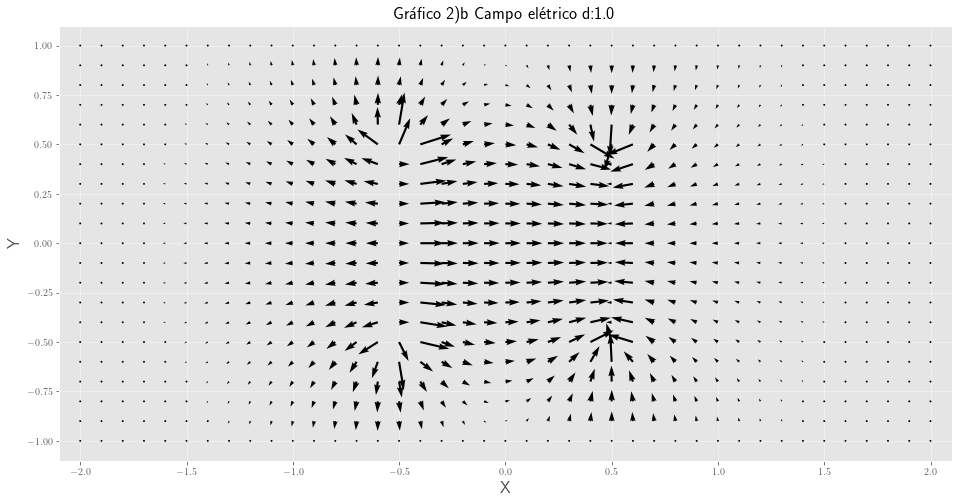

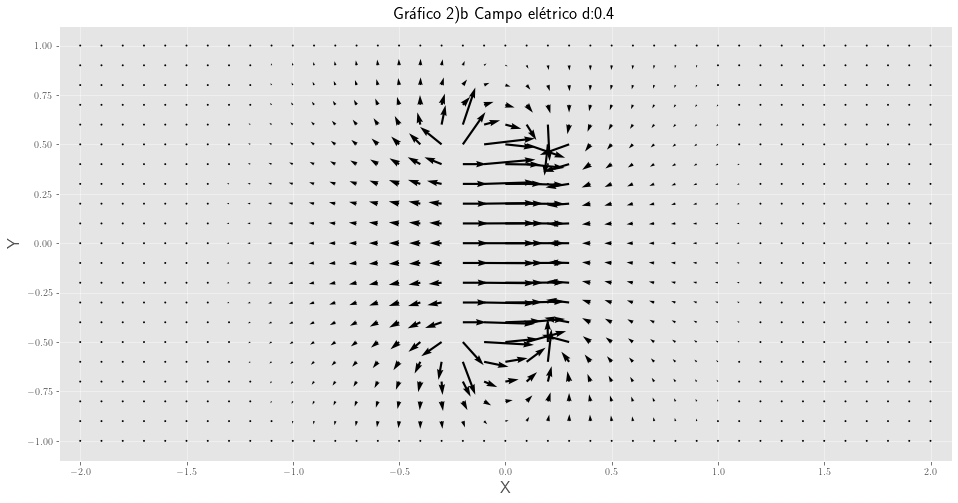

In [249]:
for i in [5,10,15,18]:
    x0e=i
    x0d=-i-1
    s=(41-x0e+x0d)*0.1
    V0=np.zeros((21,41)) #Initializing two dimension array (21x21)

    #Edge of the square with V=1
    V0[0,:]=0
    V0[-1,:]=0
    V0[:,0]=0
    V0[:,-1]=0
    V0[5:16,x0d]=-1
    V0[5:16,x0e]=1
    # V0[5:15,5:15]=0 always
    itr=0 #starting iteration n
    dx=0.1 #step

    VV=[] #iterations list
    VV.append(V0)

    while(True):
        VV.append(V0)
        for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
            for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
                VV[itr+1][i][j]=(VV[itr][i+1][j]+VV[itr][i-1][j]+VV[itr][i][j+1]+VV[itr][i][j-1])/4.0

        #boundary condition:
        VV[itr+1][5:16,x0d]=-1
        VV[itr+1][5:16,x0e]=1
        VV[itr+1][0,:]=0
        VV[itr+1][-1,:]=0
        VV[itr+1][:,0]=0
        VV[itr+1][:,-1]=0

        dVV=VV[itr+1]-VV[itr]
        dV=0
        for i in range(1,V0.shape[0]-1):
            for j in range(1,V0.shape[0]-1):
                dV=dV+abs(dVV[i][j])
        #print dV 

        itr=itr+1
        if dV<0.0001 and itr>55:
            break

    V=np.array(VV[-1])
    x=np.arange(-2.0,2.01,dx)
    y=np.arange(-1.0,1.01,dx)
    X,Y=np.meshgrid(x,y)

    Ex=np.zeros((21,41))
    Ey=np.zeros((21,41))
    for i in range(1,40):
        for j in range(1,20):
            Ex[j][i]=-(V[j][i+1]-V[j][i-1])/(2*dx)
            Ey[j][i]=-(V[j+1][i]-V[j-1][i])/(2*dx)

    fig=plt.figure(figsize=(16,8))
    Q=quiver(X,Y,Ex,Ey,scale=100)
    plt.xlim(-2.1,2.1)
    plt.ylim(-1.1,1.1)
    plt.title("Gráfico 2)b Campo elétrico d:{:.1f}".format(s),fontsize='xx-large')
    plt.xlabel("X",fontsize='xx-large')
    plt.ylabel("Y",fontsize='xx-large')
    filename='grafico2b'+str(int(s))+'.png'
    fig.savefig(filename, bbox_inches='tight', dpi=100)
    plt.show()

## Questão 3

Carga pontual dentro de um cubo metálico de parede V=0. Estudar o comportamento das curvas de potencial para diferentes planos xy (diferentes alturas de z)

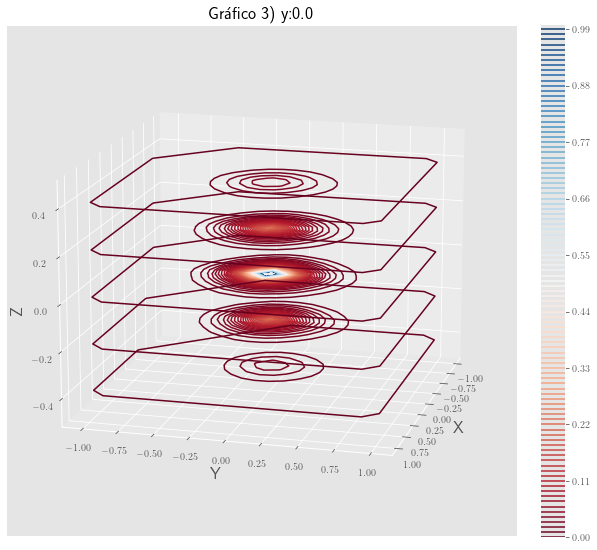

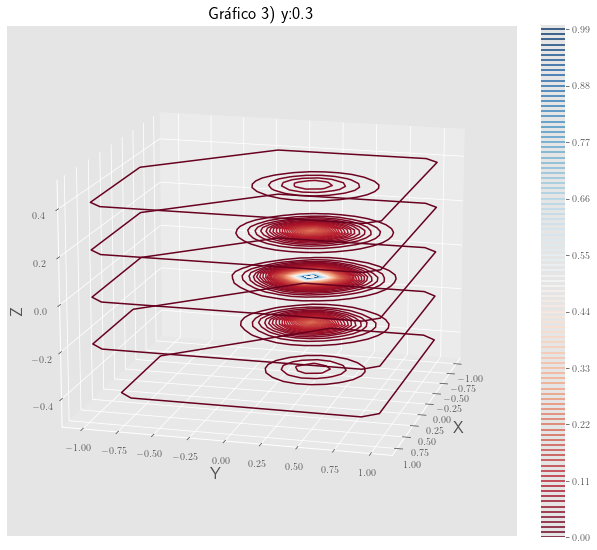

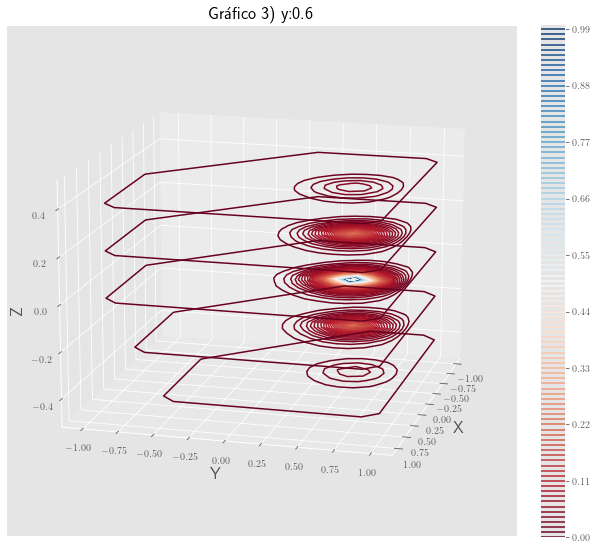

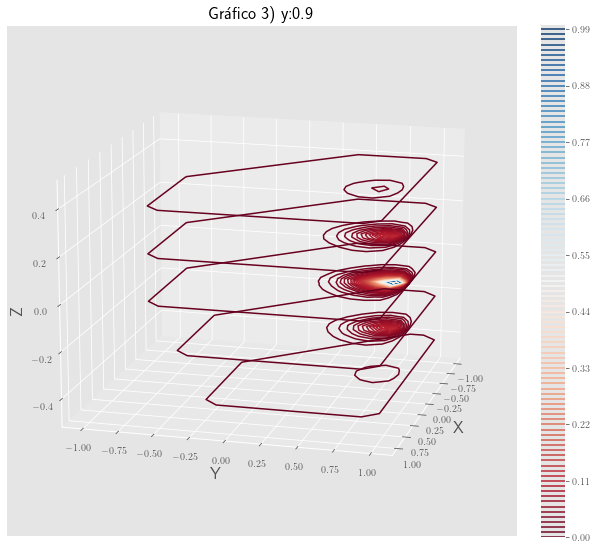

In [12]:
for l in [10,13,16,19]:
    V0=np.zeros((21,21,21)) #Initializing three dimension array (21x21)

    #Edge of the square with V=1
    V0[0,:,:]=0
    V0[-1,:,:]=0
    V0[:,0,:]=0
    V0[:,-1,:]=0
    V0[:,:,0]=0
    V0[:,:,-1]=0
    #V0[10,l,10]=1

    # V0[5:15,5:15]=0 always
    itr=0 #starting iteration n
    dx=0.1 #step

    VV=[] #iterations list
    VV.append(V0)

    while(True):
        VV.append(V0)
        for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
            for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
                    for k in range(1,V0.shape[2]-1):#not looking on the edges in z direction
                        if i==10 and j==l and k==10:
                            VV[itr+1][i][j][k]=(VV[itr][i+1][j][k]+VV[itr][i-1][j][k]+
                                                VV[itr][i][j+1][k]+VV[itr][i][j-1][k]+
                                                VV[itr][i][j][k+1]+VV[itr][i][j][k-1])/6.0+1/(6.0*dx)
                        else:
                            VV[itr+1][i][j][k]=(VV[itr][i+1][j][k]+VV[itr][i-1][j][k]+
                                                VV[itr][i][j+1][k]+VV[itr][i][j-1][k]+
                                                VV[itr][i][j][k+1]+VV[itr][i][j][k-1])/6.0


        #boundary condition:
        VV[itr+1][0,:,:]=0
        VV[itr+1][-1,:,:]=0
        VV[itr+1][:,0,:]=0
        VV[itr+1][:,-1,:]=0
        VV[itr+1][:,:,0]=0
        VV[itr+1][:,:,-1]=0
        #VV[itr+1][10,l,10]=1

        dVV=VV[itr+1]-VV[itr]
        dV=0
        for i in range(1,V0.shape[0]-1):
            for j in range(1,V0.shape[0]-1):
                for k in range(1,V0.shape[2]-1):
                    dV=dV+abs(dVV[i][j][k])
        #print dV 

        itr=itr+1
        if dV<0.0001 and itr>14:
            break

    V=np.array(VV[-1])
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="3d")
    z=np.arange(-1.0,1.1,.1)
    levels=[i*0.01 for i in range(101)]
    x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
    y=np.arange(-1.0,1.01,dx)
    X,Y=np.meshgrid(x,y)
    for i in [6,8,10,12,14]:
        im=ax.contour(X, Y, V[:,:][i],vmin=0,vmax=1,levels=levels,cmap=matplotlib.cm.RdBu, linestyles="solid", offset=z[i])
    ax.set_zlim(-.5,.5)
    ax.view_init(15, 15)
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.title("Gráfico 3) y:{:.1f}".format(abs((20-l)*.1-1)),fontsize='xx-large')
    ax.set_xlabel('X',fontsize='xx-large')
    ax.set_ylabel('Y',fontsize='xx-large')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Z',rotation=90,fontsize='xx-large')
    filename='grafico3'+str(l)+'.png'
    fig.savefig(filename, bbox_inches='tight', dpi=100)
    plt.show()


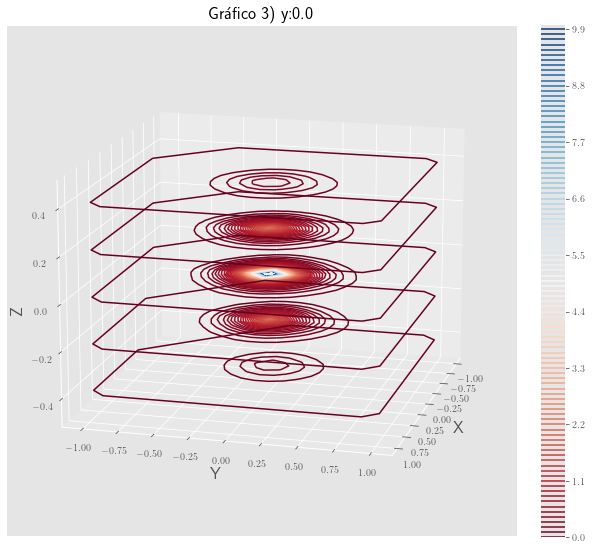

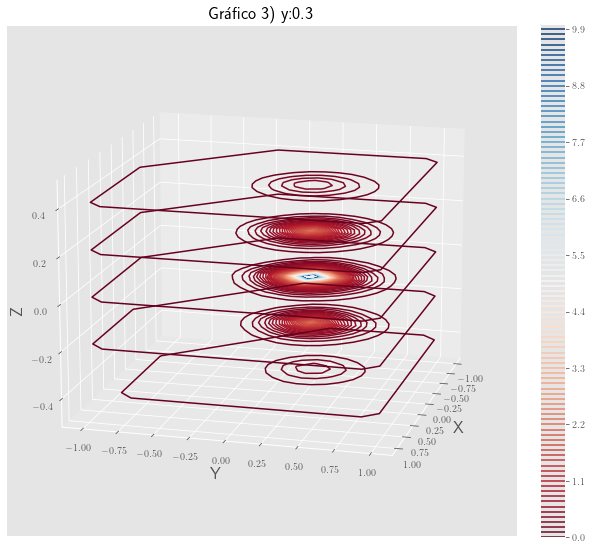

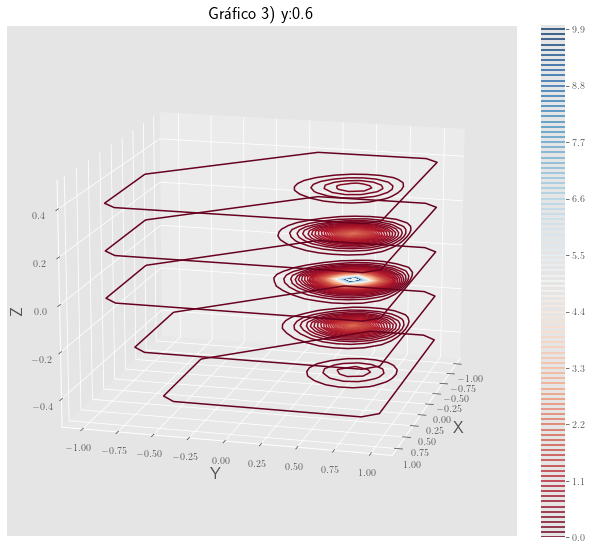

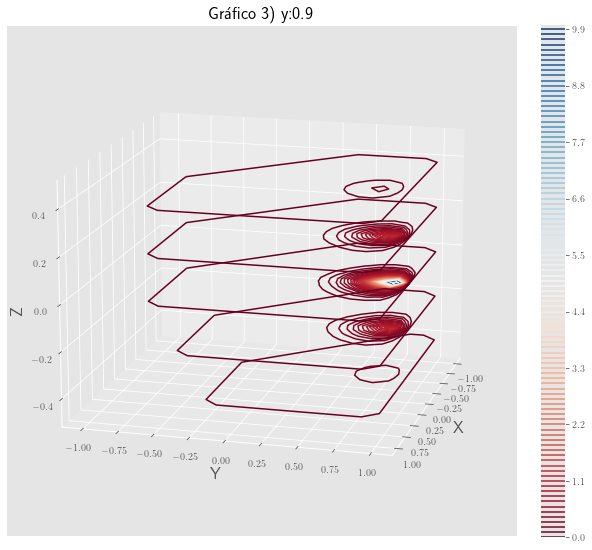

In [24]:
for l in [10,13,16,19]:
    V0=np.zeros((21,21,21)) #Initializing three dimension array (21x21)

    #Edge of the square with V=1
    V0[0,:,:]=0
    V0[-1,:,:]=0
    V0[:,0,:]=0
    V0[:,-1,:]=0
    V0[:,:,0]=0
    V0[:,:,-1]=0
    #V0[10,l,10]=-10

    # V0[5:15,5:15]=0 always
    itr=0 #starting iteration n
    dx=0.1 #step

    VV=[] #iterations list
    VV.append(V0)

    while(True):
        VV.append(V0)
        for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
            for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
                    for k in range(1,V0.shape[2]-1):#not looking on the edges in z direction
                        if i==10 and j==l and k==10:
                            VV[itr+1][i][j][k]=(VV[itr][i+1][j][k]+VV[itr][i-1][j][k]+
                                                VV[itr][i][j+1][k]+VV[itr][i][j-1][k]+
                                                VV[itr][i][j][k+1]+VV[itr][i][j][k-1])/6.0+10/(6.0*dx)
                        else:
                            VV[itr+1][i][j][k]=(VV[itr][i+1][j][k]+VV[itr][i-1][j][k]+
                                                VV[itr][i][j+1][k]+VV[itr][i][j-1][k]+
                                                VV[itr][i][j][k+1]+VV[itr][i][j][k-1])/6.0


        #boundary condition:
        VV[itr+1][0,:,:]=0
        VV[itr+1][-1,:,:]=0
        VV[itr+1][:,0,:]=0
        VV[itr+1][:,-1,:]=0
        VV[itr+1][:,:,0]=0
        VV[itr+1][:,:,-1]=0
        #VV[itr+1][10,l,10]=-10

        dVV=VV[itr+1]-VV[itr]
        dV=0
        for i in range(1,V0.shape[0]-1):
            for j in range(1,V0.shape[0]-1):
                for k in range(1,V0.shape[2]-1):
                    dV=dV+abs(dVV[i][j][k])
        #print dV 

        itr=itr+1
        if dV<0.0001 and itr>14:
            break

    V=np.array(VV[-1])
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="3d")
    z=np.arange(-1.0,1.1,.1)
    levels=[i*0.1 for i in range(101)]
    for i in [6,8,10,12,14]:
        im=ax.contour(X, Y, V[:,:][i],vmin=0,vmax=10,levels=levels,cmap=matplotlib.cm.RdBu, linestyles="solid", offset=float(z[i]))
    ax.set_zlim(-.5,.5)
    ax.view_init(15, 15)
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.title("Gráfico 3) y:{:.1f}".format(abs((20-l)*.1-1)),fontsize='xx-large')
    ax.set_xlabel('X',fontsize='xx-large')
    ax.set_ylabel('Y',fontsize='xx-large')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Z',rotation=90,fontsize='xx-large')
    filename='grafico3'+str(l)+'10.png'
    #fig.savefig(filename, bbox_inches='tight', dpi=100)
    plt.show()


## Questão 4
Movimento de uma onda em uma corda com extremidades livre.

Condição de Contorno: y dos pontos das extremidades são iguais aos dos seus pontos vizinhos.

Reflexão. Variar r, discutir erros e instabilidades para r>1 e r<1.

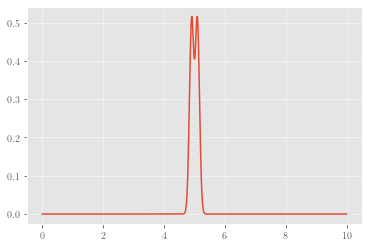

In [501]:
"""
x=i*dx
t=n*dt

A altura da corda num instante seguinte é igual:
     |
y(i,n+1)=r²*[y(i+1,n)+y(i-1,n)-2*y(i,n)]+2*y(i,n)-y(i,n-1)
                |        |                             |
             posição    posição              posição no instante
            posterior   anterior                2 x anterior

"""


"""Inicalização de Variáveis úteis"""

L=10 #tamanho da corda
Nx=1000 #numero de passos em x
dx=L/Nx #tamanho do passo

r2=1 #r²

dt=.1
T=200 #periodo de tempo
Nt=int(T/dt) #numero de passos em t

k=100 #parametros da gaussiana
x0=L/2



y=np.zeros((Nx,Nt)) #toda informação do y aqui, (x,t)

#inicializar y(x,0):
for i in range(Nx):
    y[i,0]=np.exp(-k*(i*dx-x0)**2)

#como V=0 y(x,1)=y(x,0):
for i in range(Nx):
    y[i,1]=np.exp(-k*(i*dx-x0)**2)
    
    
#propagate:
for n in range(1,Nt-1):
    y[0,n]=y[1,n]
    y[-1,n]=y[-2,n]
    for i in range(Nx-1):
        y[i,n+1]=r2*(y[i+1,n]+y[i-1,n])+2*(1-r2)*y[i,n]-y[i,n-1]


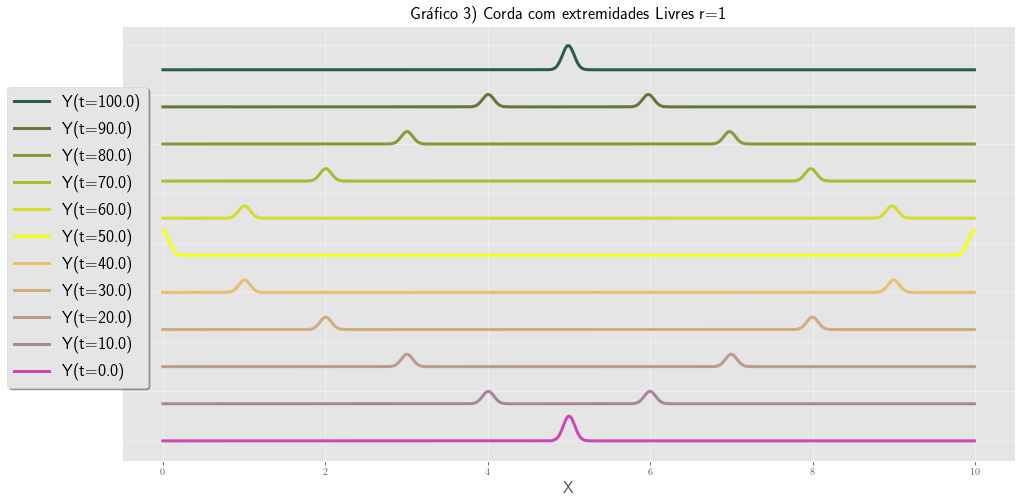

In [576]:
fig=plt.figure(figsize=(16,8))
colors=['#2b5c44', '#617839', '#879837', '#acb932', '#d3dc27', 
        '#faff0c', '#e7c06c', '#d1ad7d', '#bc9a8c', '#ab849b', '#cf45b6']
handles = []
for t,c in zip(np.arange(Nt//2,-100,-100),colors):
    plt.plot(x,np.array(y[:,t])+t*.015,linewidth=3,label="Y(t={:.1f})".format(t*dt),color=c)
#plt.ylim(0,16.5)
plt.title("Gráfico 3) Corda com extremidades Livres r=1",fontsize='xx-large')
plt.xlabel("X",fontsize='xx-large')
#plt.ylabel("Y(t)",fontsize='xx-large')
plt.legend(fontsize='xx-large',loc='upper center', bbox_to_anchor=(-0.05, .88),ncol=1,fancybox=True,shadow=True)
plt.tick_params(axis='y', colors='white')
fig.savefig('grafico4a', bbox_inches='tight', dpi=100)
plt.show()


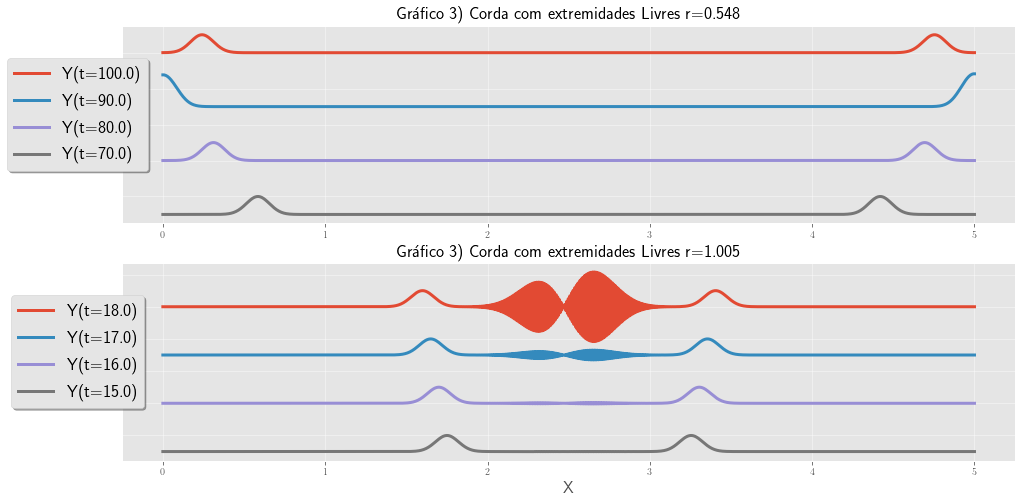

In [646]:
P=1
fig=plt.figure(figsize=(16,8))
for r2 in [.3,1.01]:
    L=5 #tamanho da corda
    Nx=1000 #numero de passos em x
    dx=L/Nx #tamanho do passo



    dt=.1
    T=200 #periodo de tempo
    Nt=int(T/dt) #numero de passos em t

    k=100 #parametros da gaussiana
    x0=L/2
    y=np.zeros((Nx,Nt)) #toda informação do y aqui, (x,t)

    #inicializar y(x,0):
    for i in range(Nx):
        y[i,0]=np.exp(-k*(i*dx-x0)**2)

    #como V=0 y(x,1)=y(x,0):
    for i in range(Nx):
        y[i,1]=np.exp(-k*(i*dx-x0)**2)


    #propagate:
    for n in range(1,Nt-1):
        y[0,n]=y[1,n]
        y[-1,n]=y[-2,n]
        for i in range(Nx-1):
            y[i,n+1]=r2*(y[i+1,n]+y[i-1,n])+2*(1-r2)*y[i,n]-y[i,n-1]


    plt.subplot(2,1,P)
    colors=['#2b5c44', '#617839', '#879837', '#acb932', '#d3dc27', 
            '#faff0c', '#e7c06c', '#d1ad7d', '#bc9a8c', '#ab849b', '#cf45b6']
    handles = []
    x=np.linspace(0,5,Nx)
    if P==2: ran=np.arange(180,140,-10)
    else: ran=np.arange(1000,600,-100)
    for t in ran:
        if P==1: plt.plot(x,np.array(y[:,t])+t*.015,linewidth=3,label="Y(t={:.1f})".format(t*dt))
        else: plt.plot(x,np.array(y[:,t])+t*.15,linewidth=3,label="Y(t={:.1f})".format(t*dt))
    #plt.ylim(0,16.5)
    plt.title("Gráfico 3) Corda com extremidades Livres r={:.3f}".format(np.sqrt(r2)),fontsize='xx-large')
    if P==2: plt.xlabel("X",fontsize='xx-large')
    #plt.ylabel("Y(t)",fontsize='xx-large')
    plt.legend(fontsize='xx-large',loc='upper center', bbox_to_anchor=(-0.05, .88),ncol=1,fancybox=True,shadow=True)
    plt.tick_params(axis='y', colors='white')
    #filename='grafico4r'+str(int(r2))+'png'
    #fig.savefig(filename, bbox_inches='tight', dpi=100)
    P=2
fig.savefig('grafico4b', bbox_inches='tight', dpi=100)
plt.show()
